# Polar Coordinate Transforms & Ellipse Correction

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import os
%aimport -os
import sys
%aimport -sys
import numpy as np
%aimport -numpy
from itertools import chain, product
import matplotlib.pyplot as plt
%aimport -matplotlib.pyplot

nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [3]:
from webmet.merge import find_line_orientation

def to_polar_coords_single(point, origin=None):
    x,y = point
    if origin is not None:
        ox, oy = origin
        x = x - ox
        y = y - ox  # OH FUCK
    r = np.sqrt(x**2+y**2)
    t = np.arctan2(y,x)
    return r,t

print(to_polar_coords_single([3,4]))
print(to_polar_coords_single([4,5], [1,1]))

(5.0, 0.9272952180016122)
(5.0, 0.9272952180016122)


In [4]:
def to_polar_coords_multiple(points, origin=None):
    if isinstance(points, list):
        points = np.array(points)
    x,y = points[:,0], points[:,1]
    if origin is not None:
        ox, oy = origin
        x = x - ox
        y = y - oy
    r = np.sqrt(x**2+y**2)
    t = np.arctan2(y,x)
    return list(zip(r,t))
print(to_polar_coords_multiple([[1,0], [0,5]]))
# print(to_polar_coords_multiple([[1,0], [0,5]], [1,1]))
# print(to_polar_coords_single([3,4]))

[(1.0, 0.0), (5.0, 1.5707963267948966)]


In [5]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def to_polar_coords_linelist(linelist, origin=None):
    points = np.array(list(chain.from_iterable(linelist)))
    transformed = to_polar_coords_multiple(points, origin)
    return [x for x in chunks(transformed, 2)]

print(to_polar_coords_linelist([[[1,2], [2,3]], [[1,2], [2,3]], [[1,2], [2,3]], [[1,2], [2,3]]]))

[[(2.23606797749979, 1.1071487177940904), (3.605551275463989, 0.982793723247329)], [(2.23606797749979, 1.1071487177940904), (3.605551275463989, 0.982793723247329)], [(2.23606797749979, 1.1071487177940904), (3.605551275463989, 0.982793723247329)], [(2.23606797749979, 1.1071487177940904), (3.605551275463989, 0.982793723247329)]]


---
Now that we have some working Polar coordinate transform functions, (and have implemented them into the module) let's test the class methods.

In [6]:
from webmet.merge import WebLine

testline = WebLine([[1,2], [2,3]])
print(testline)
testline.to_polar()
testline.transformed_line

[[1, 2], [2, 3]]
Length: 1.4142135623730951
Orientation: -2.356194490192345
Type: Uncategorised
ID: -1


[(2.23606797749979, 1.1071487177940904),
 (3.605551275463989, 0.982793723247329)]

In [7]:
from webmet.merge import WebKernel, load_kernel, multi_find_centroid

testkernel = load_kernel("../data/full_web_kernel.json")
starting_centroid = multi_find_centroid(testkernel.lines)
testkernel = testkernel.to_polar(origin = (1257, 1105), flipped = True)

In [8]:
testkernel.dimensions

[2816, 2112]

In [9]:
testpolar = testkernel.as_list_transformed()
testpolar_line_orientations = [find_line_orientation(l) for l in testpolar]
testpolar_line_orientations

[-1.5707655549655035,
 1.544203865321248,
 1.5706548742405912,
 1.5563764098950603,
 -1.5707385371456304,
 1.5702083334153496,
 -1.5707722685393464,
 1.5771996071685952,
 1.5704224563297835,
 1.570808345980061,
 -1.5704994635320555,
 -1.5708555499794326,
 -1.5710231146790006,
 -1.5600064644540512,
 1.5708354894570509,
 1.5707858647930475,
 -1.5707260854091727,
 -1.570890578251802,
 1.57083586654393,
 -1.5705705537624977,
 1.572686421239427,
 1.5706891835760617,
 -1.5707150436183062,
 1.581024217085568,
 -1.5708383286749843,
 1.570906117279592,
 -1.570835222137981,
 1.5749109225749498,
 -1.5689775422958407,
 1.570880576155838,
 -1.5708362916375374,
 1.5707653588200077,
 1.575296450788331,
 1.560097989723549,
 1.5706316618608132,
 1.5709745600443386,
 1.5708879326691536,
 1.5711612058416058,
 -1.570921303694551,
 1.5708095979735472,
 -1.5707271028745444,
 -1.569061918434149,
 1.523177705140543,
 1.5708059108536285,
 -1.5706212987017854,
 1.5839056684268362,
 1.5713520320880852,
 -1.57070

In [10]:
t, r = zip(*list(chain.from_iterable(testpolar)))
np.pi*500

1570.7963267948965

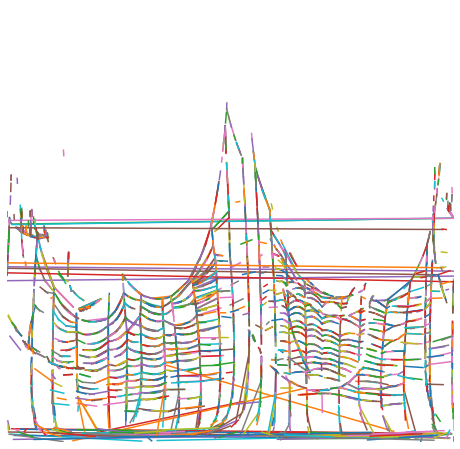

In [11]:
demofig = np.full((2000, 1571), 0, dtype=np.uint8)
fig,ax = plt.subplots(1, figsize=(8,8))
# ax.imshow(demofig)

for line in testpolar:
    p0, p1 = line
    ax.plot((p0[0]*250, p1[0]*250), (p0[1], p1[1]))
# ax.plot(*full_centroid, 'ro', markersize=12)
ax.set_xlim((int(-np.pi*250), int(np.pi*250)))
ax.set_ylim(0,2000)
ax.axis('off')
plt.show()

Hey look! A lovely polar coordinate unwrap of the web!

Below there is a quick generator to test random coordinates of 

In [12]:
testkernel_test = testkernel
testkernel_test.to_polar(origin = (1257, 1105), overwrite = True, flipped = True).as_list_transformed()


[[(-2.753892155987136, 748.5572790374829),
  (-2.754583477965523, 771.0233459500432)],
 [(-0.12697278961407893, 47.38143096192854),
  (-0.7853981633974483, 22.627416997969522)],
 [(0.2672334031047835, 446.8612760130374),
  (0.24735395557182352, 306.3233585608515)],
 [(0.20474065336014693, 186.90371852908652),
  (-2.0647376957144776, 29.5296461204668)],
 [(-2.768668516707304, 636.7676185234296),
  (-2.7700747984430842, 661.1021101161302)],
 [(0.2677285298329215, 415.81366018927275),
  (0.07216362895965758, 83.21658488546619)],
 [(-0.027971042412527226, 1108.4335794263905),
  (-0.028838156871118882, 1144.4758625676645)],
 [(-3.0099154821141534, 982.5054707226825),
  (-2.756753889246974, 942.9697768221419)],
 [(0.2641701645806579, 379.15300341682644),
  (0.1725105076066769, 133.98880550254935)],
 [(2.8060340009929186, 549.6562562183751),
  (2.8072200486371304, 450.97671780259344)],
 [(-1.452258160926422, 490.4416377103396),
  (-1.460777267627542, 519.1387097876636)],
 [(-2.504522324314109

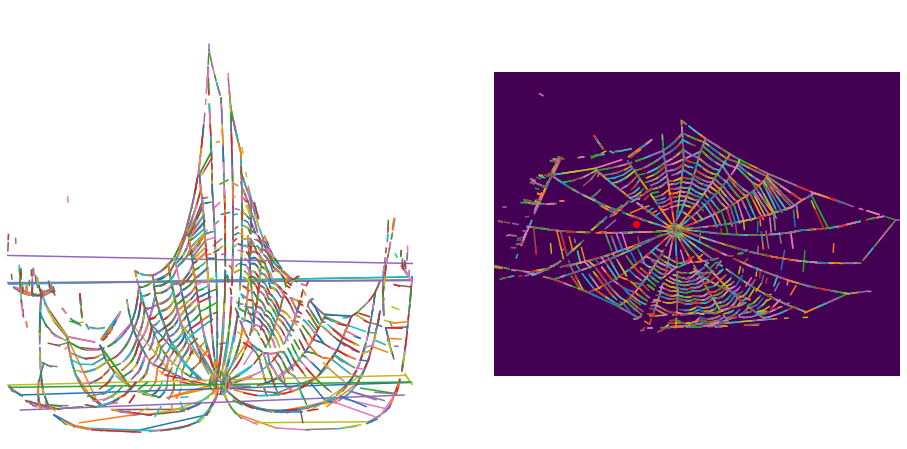

In [13]:
demofig = np.full(testkernel.dimensions[::-1], 0, dtype=np.uint8)

rng = np.random.default_rng()

# testkernel.dimensions[0]
# use rng.normal instead?
centroid_x = int(rng.integers(0, testkernel.dimensions[0], size=1)[0])
centroid_y = int(rng.integers(0, testkernel.dimensions[1], size=1)[0])

testpolar2 = testkernel.to_polar((centroid_x, centroid_y), overwrite = True, flipped = True).as_list_transformed()
# testkernel2.to_polar((centroid_x, centroid_y), overwrite = True, flipped = True)

fig,ax = plt.subplots(1, 2, figsize=(16,8))

for line in testpolar2:
    p0, p1 = line
    ax[0].plot((p0[0]*250, p1[0]*250), (p0[1], p1[1]))
ax[0].set_xlim((int(-np.pi*250), int(np.pi*250)))
ax[0].set_ylim(0,2000)

ax[1].imshow(demofig)
for line in testkernel:
    p0, p1 = line
    ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
ax[1].plot(centroid_x, centroid_y, 'ro')

ax[1].set_xlim((0, demofig.shape[1]))
ax[1].set_ylim((demofig.shape[0], 0))
ax[0].axis('off')
ax[1].axis('off')
plt.show()

Now, whilst we can get a nice polar coordinate unwrap of the web structure based upon an arbitrary centre, there is a problem of scale. As the x axis here technically only extends between -pi and + pi any orientation calculated in ths space has a distinct tendancy to be "vertical". Thus we need to rescale the polar unwrap to be approximately the same in both directions.

You can see in the plot below that this tendency towards vertical orientations is shown by peaks at $\pm\frac{\pi}{2}$, with no peaks at 0 or $\pm{\pi}$ (which we would expect if we have a decent number of horizontal and vertical lines.

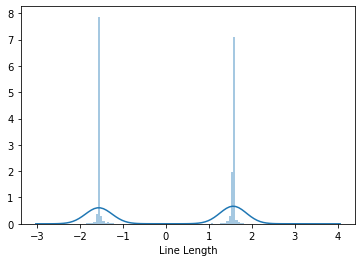

In [14]:
import seaborn as sns
%aimport -seaborn
sns.distplot(testpolar_line_orientations, hist=True,bins=100, kde=True, axlabel="Line Length")
plt.show()

In [15]:
def rescale_polar_lines(lines, dimensions=None):
    t, r = zip(*list(chain.from_iterable(lines)))
    t = np.asarray(t)
    t = t - min(t)
    if dimensions is None:
        dimensions = [max(r), max(r)]
    t = t * (max(r) / max(t))
    transformed = list(zip(t, r))
    return [x for x in chunks(transformed, 2)]

In [16]:
testpolar_rescaled = rescale_polar_lines(testpolar, testkernel.dimensions)
testpolar_rescaled_line_orientations = [find_line_orientation(l) for l in testpolar_rescaled]

Now we have rescaled and recalculated our orientations we can see a much better set of peaks around the expected numbers.

In [17]:
from ipywidgets import interactive, fixed

In [18]:


def plot_orientations(orientations, threshold):
#     threshold = np.pi/10
    maincols = ["orange", "royalblue"]
    tcols = ["gold", "skyblue"]

    plt.figure(figsize=(16, 6))
    sns.distplot(orientations, hist=True, bins=300, kde=True, axlabel="Rescaled Orientations", color='gray')
    plt.axvline(0, color=maincols[0])
    plt.axvline(0 + threshold, color=tcols[0])
    plt.axvline(0 - threshold, color=tcols[0])

    plt.axvline(np.pi, color=maincols[0])
    plt.axvline(np.pi - threshold, color=tcols[0])
    plt.axvline(-np.pi, color=maincols[0])
    plt.axvline(-np.pi + threshold, color=tcols[0])


    plt.axvline(np.pi/2, color=maincols[1])
    plt.axvline(np.pi/2 + threshold, color=tcols[1])
    plt.axvline(np.pi/2 - threshold, color=tcols[1])
    plt.axvline(-np.pi/2, color=maincols[1])
    plt.axvline(-np.pi/2 + threshold, color=tcols[1])
    plt.axvline(-np.pi/2 - threshold, color=tcols[1])
    plt.xlim(-np.pi, np.pi)
    plt.show()
    
interactive_plot = interactive(plot_orientations, orientations=fixed(testpolar_rescaled_line_orientations), threshold=(np.pi/512, np.pi/4))
s = interactive_plot.children[0]
s.step=0.01
s.continuous_update=False
interactive_plot

interactive(children=(FloatSlider(value=0.3957670432744954, continuous_update=False, description='threshold', …

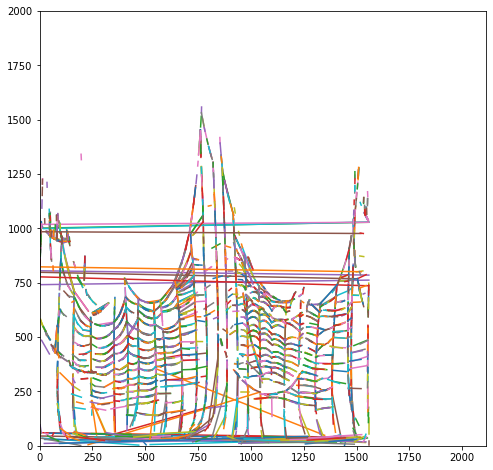

In [19]:
demofig = np.full((2000, 1571), 0, dtype=np.uint8)
fig,ax = plt.subplots(1, figsize=(8,8))
# ax.imshow(demofig)

for line in rescale_polar_lines(testpolar, testkernel.dimensions):
    p0, p1 = line
    ax.plot((p0[0], p1[0]), (p0[1], p1[1]))
# ax.plot(*full_centroid, 'ro', markersize=12)
ax.set_xlim(0, testkernel.dimensions[1])
ax.set_ylim(0,2000)
# ax.axis('off')
plt.show()

In [20]:
def is_horiz(theta, threshold=np.pi/20):
    if np.pi/2 + threshold >= theta >= np.pi/2 - threshold:
        return True
    if -np.pi/2 + threshold >= theta >= np.pi/2 - threshold:
        return True
    return False

def is_vert(theta, threshold=np.pi/20):
    if 0 + threshold >= theta >= 0 - threshold:
        return True
    if -np.pi + threshold >= theta >= -np.pi:
        return True
    if np.pi >= theta >= np.pi - threshold:
        return True
    return False
    
horiz = len([1 for o in testpolar_rescaled_line_orientations if is_horiz(o, np.pi/10)])
vert = len([1 for o in testpolar_rescaled_line_orientations if is_vert(o, np.pi/10)])
print("H: {}, V: {}, T:{}".format(horiz, vert, len(testpolar_rescaled_line_orientations)))
print("{}% categorised".format(((horiz + vert)/len(testpolar_rescaled_line_orientations))*100))

H: 700, V: 912, T:3476
46.37514384349827% categorised


In [21]:
def assess_hub_fit(hub, kernel, threshold=np.pi/20, returnfittedproportion=False):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    polar = kernel.to_polar(origin = hub, overwrite = True, flipped = True).as_list_transformed()
    polar_rescaled = rescale_polar_lines(polar, kernel.dimensions)
    line_orientations = [find_line_orientation(l) for l in polar_rescaled]
    horiz = len([1 for o in line_orientations if is_horiz(o, threshold)])
    vert = len([1 for o in line_orientations if is_vert(o, threshold)])
#     print("H: {}, V: {}, T:{}".format(horiz, vert, len(testpolar_rescaled_line_orientations)))
#     if returnfittedproportion:
#         return (horiz + vert)/len(line_orientations)
#     return 1 - ((horiz + vert)/len(line_orientations))
    if returnfittedproportion:
        return (horiz + vert)
    return len(line_orientations) - (horiz + vert)

In [22]:
assess_hub_fit((1257, 1105), testkernel, np.pi/20)

2350

In [23]:
from scipy import optimize
# hubmin = optimize.minimize(assess_hub_fit, x0 = (600, 600), tol=0.1, options={"disp": True}, args=(testkernel, np.pi/128))
hubmin = optimize.differential_evolution(assess_hub_fit, tol=0.01, init="latinhypercube", bounds=[[0,2000],[0,2000]], args=(testkernel, np.pi/128))
print(hubmin)

     fun: 3026.0
 message: 'Optimization terminated successfully.'
    nfev: 453
     nit: 14
 success: True
       x: array([1260.66414182, 1117.51822803])


In [24]:
import pandas as pd
%aimport -pandas
from pandarallel import pandarallel
%aimport -pandarallel

pandarallel.initialize(progress_bar=True)

INFO: Pandarallel will run on 12 workers.
INFO: Pandarallel will use Memory file system to transfer data between the main process and workers.


In [25]:
# %%timeit -n 1 -r 1
n_samples = 10
hub_xs = np.linspace(0, testkernel.dimensions[0], n_samples)
hub_ys = np.linspace(0, testkernel.dimensions[1], n_samples)
hubset = pd.DataFrame(list(product(hub_xs, hub_ys)))
hubset = hubset.rename(columns={0: "x", 1: "y"})
# hubset_outputs = hubset.apply(assess_hub_fit, axis=1,result_type="expand", args=(testkernel, np.pi/20))
hubset_outputs = hubset.parallel_apply(assess_hub_fit, axis=1,result_type="expand", args=(testkernel, np.pi/50))
hubset = pd.concat([hubset, hubset_outputs], axis=1)
hubset = hubset.rename(columns={0: "score"})
# hubset.to_csv("../results/demo_stick/heatmap_100x100.csv", index=False)
hubset_pivot = hubset.pivot("y", "x", "score")
# print(hubset)

In [26]:
# hubset.to_csv("../results/demo_stick/heatmap_100x100_threshpi50.csv", index=False)

(0.0, 10.0, 10.0, 0.0)

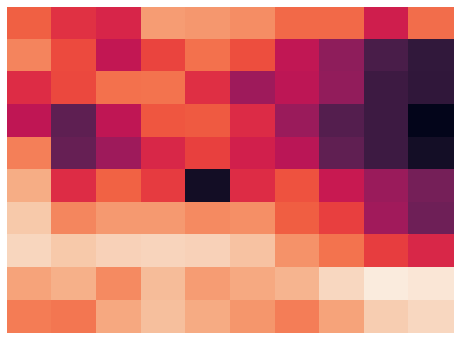

In [27]:
fig, ax = plt.subplots(figsize=(8,6))
sns.heatmap(hubset_pivot, ax=ax, cbar=False)
# hubset_plot.figure.savefig("../results/test.png")
# plt.show()
ax.axis('off')
# plt.savefig("../results/test.png", bbox_inches='tight', pad_inches = 0.2)

In [28]:
# n_samples = 200
# hub_xs = np.linspace(0, testkernel.dimensions[0], n_samples)
# hub_ys = np.linspace(0, testkernel.dimensions[1], n_samples)
# hubset200 = pd.DataFrame(list(product(hub_xs, hub_ys)))
# hubset200 = hubset200.rename(columns={0: "x", 1: "y"})
# # hubset_outputs = hubset.apply(assess_hub_fit, axis=1,result_type="expand", args=(testkernel, np.pi/20))
# hubset200_outputs = hubset200.parallel_apply(assess_hub_fit, axis=1,result_type="expand", args=(testkernel, np.pi/50))
# hubset200 = pd.concat([hubset200, hubset200_outputs], axis=1)
# hubset200 = hubset200.rename(columns={0: "score"})
# # hubset200.to_csv("../results/demo_stick/heatmap_200x200.csv", index=False)
# hubset200_pivot = hubset200.pivot("y", "x", "score")
# # print(hubset)

In [29]:
# sns.heatmap(hubset200_pivot)

In [30]:
# pandarallel.initialize()

In [31]:
# threshes = [1,2,4,8,16,32,64,128,256,512]
# # threshes = np.asarray([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5])
# # threshes = 2 ** threshes
# print(threshes)
# n_samples = 100
# hub_xs = np.linspace(0, testkernel.dimensions[0], n_samples)
# hub_ys = np.linspace(0, testkernel.dimensions[1], n_samples)
# for t in threshes:
#     print("Working on threshold of pi/{}".format(t))
#     hubset = pd.DataFrame(list(product(hub_xs, hub_ys)))
#     hubset = hubset.rename(columns={0: "x", 1: "y"})
#     hubset_outputs = hubset.parallel_apply(assess_hub_fit, axis=1,result_type="expand", args=(testkernel, np.pi/t))
#     hubset = pd.concat([hubset, hubset_outputs], axis=1)
#     hubset = hubset.rename(columns={0: "score"})
#     hubset_pivot = hubset.pivot("y", "x", "score")
#     fig, ax = plt.subplots(figsize=(8,6))
#     sns.heatmap(hubset_pivot, ax=ax, cbar=False)
#     ax.axis('off')
#     plt.savefig("../results/thresh_sens/{0}x{0}/{0}x{0}_{1}.png".format(n_samples, t), bbox_inches='tight', pad_inches = 0.2)

- Make proximity between origin and centroid a part of the payoff function.

- Tag web lines according to "asses hub position" func thing

- **PLOT DENSITY FUNCTION OF HORIZONTAL LINES IN POLAR SPACE ALONG THE Y AXIS**
    - This allows us to identify the hub, free zone & capture area.

- _For ELLIPTICAL transform, we ONLY need the angle and the ratio between the long & short axes of the ellipse, as the transformation from that back to an equivalent circle is always the same no matter what scale we are operating on._

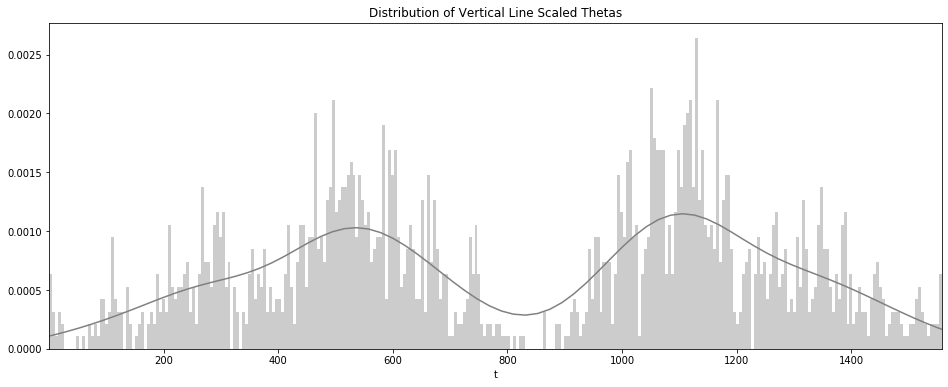

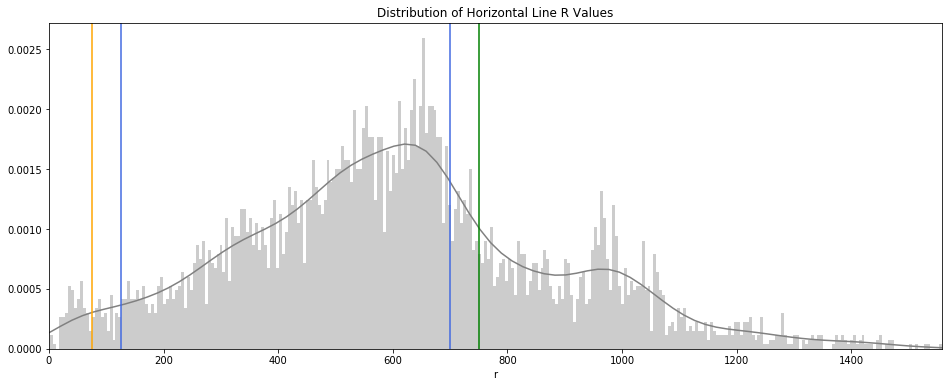

0

In [32]:
def classify_threads(kernel, hub, threshold=np.pi/20, vertthresh=True):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    polar = kernel.to_polar(origin = hub, flipped = True).as_list_transformed()
    polar_rescaled = rescale_polar_lines(polar, kernel.dimensions)
    line_orientations = [find_line_orientation(l) for l in polar_rescaled]
    
    polar_rescaled_withorientation = list(zip(polar_rescaled, line_orientations))
    
    vert =  [l for l in polar_rescaled_withorientation if is_vert(l[1], threshold)]
    if vertthresh:
        # Define horizontal as "not vertical"
        horiz = [l for l in polar_rescaled_withorientation if not is_vert(l[1], threshold)]
    else:
        # Define horizontal as "within threshold of true horizontal"
        horiz = [l for l in polar_rescaled_withorientation if is_horiz(l[1], threshold)]
    
    # Re-extract x coords of vertical lines.
    vert_x_coords, _ = list(zip(*vert))
    vert_x_coords,_  = zip(*list(chain.from_iterable(vert_x_coords)))
    
    plt.figure(figsize=(16, 6))
    sns.distplot(vert_x_coords, hist=True,bins=300, kde=True, axlabel="t", color='gray')
#     plt.axvline(75, color="orange")
#     plt.axvline(125, color="royalblue")
#     plt.axvline(700, color="royalblue")
#     plt.axvline(750, color="green")
    plt.xlim(min(vert_x_coords), max(vert_x_coords))
    plt.title('Distribution of Vertical Line Scaled Thetas')
    plt.show()
    
    # Re-extract y coords of horizontal lines.
    horiz_y_coords, _ = list(zip(*horiz))
#     print(horiz_y_coords[0])
    _, horiz_y_coords = zip(*list(chain.from_iterable(horiz_y_coords)))
    
    plt.figure(figsize=(16, 6))
    sns.distplot(horiz_y_coords, hist=True,bins=300, kde=True, axlabel="r", color='gray')
    maincols = ["orange", "royalblue"]
    plt.axvline(75, color="orange")
    plt.axvline(125, color="royalblue")
    plt.axvline(700, color="royalblue")
    plt.axvline(750, color="green")
    plt.xlim(0, max(horiz_y_coords))
    plt.title('Distribution of Horizontal Line R Values')
    plt.show()
    
    return 0
classify_threads(testkernel, (1257, 1105), np.pi/10)

**Maybe weight dist by length of lines**

The above method will definitely work _best_ on data which is correctly merged. This whole task is a nested set of

[chicken and the [chicken and the [chicken and the egg]]]

1. Find the hub
2. Find the ellipse rescaling transform
3. Check the hub again
4. Categorise the lines for merging and tag them
5. Merge lines in normal space
6. Polar transform and analyse, building on `classify_threads`
7. Categorise lines according to this procedure
8. Derive capture area, find total length of CA lines

## Ellipse Backtransform

The Ellipse rescaling transform that we need to do can be summarised as a rotation followed by a elliptical transform 

- Implement Ellipse transform
- Make payoff system modular
    - Payoff for (are we in the hub?) may well be different to (is our ellipse transform correct)

Ellipse transforms translation & rotation followed by a scaling.

$$\delta_{XG}=k((\delta_y-y_G)\sin\theta_r+(\delta_x-x_G)\cos\theta_r)$$

$$\delta_{YG}=\frac{1}{k}((\delta_y-y_G)\cos\theta_r-(\delta_x-x_G)\sin\theta_r)$$

Taking the area of an ellipse:
$$A = xy\pi$$
Adding the scaling factors:
$$A = kx\frac{1}{k}y\pi$$
And multiplying out:
$$A = (\frac{1}{k}\frac{k}{1})xy\pi$$
$$\frac{1}{k}\frac{k}{1} = \frac{1k}{k1} = \frac{k}{k} = 1$$
We find that this transform is area preserving:
$$A = xy\pi$$

In [33]:
def ellipse_transform_multiple(points, origin, orientation, scaling):
    if isinstance(points, list):
        points = np.array(points)
        
    x,y = points[:,0], points[:,1]
    
    tx = scaling * (((y - origin[1]) * np.sin(orientation)) + ((x - origin[0]) * np.cos(orientation)))
    ty = (1/scaling) * (((y - origin[1]) * np.cos(orientation)) - ((x - origin[0]) * np.sin(orientation)))
    
    # Backtransform
    
    newx = (origin[0] + np.cos(orientation)*tx - np.sin(orientation)*ty)#.tolist()
    newy = (origin[1] + np.sin(orientation)*tx + np.cos(orientation)*ty)#.tolist()
    return list(zip(newx,newy))

ellipse_transform_multiple([[[0,1], [2,1]], [[1,0], [1,2]]], [1,1], 0, 4)
to_polar_coords_multiple([[[0,1], [2,1]], [[1,0], [1,2]]], [1,1])

[(array([1.41421356, 0.        ]), array([2.35619449, 0.        ])),
 (array([0.        , 1.41421356]), array([0.        , 2.35619449]))]

In [34]:
ell_test_coords=[[7,7], [9,9], [7,9], [9,7], [5,6], [2,3]]
def play_ellipse_interactive(coords, ox, oy, orientation, scale):
    transformed = ellipse_transform_multiple(coords, [ox,oy], orientation, scale)
    demofig = np.full((16,16), 0, dtype=np.uint8)
    fig,ax = plt.subplots(1, figsize=(8,8))
    ax.imshow(demofig)
    for point in coords:
        ax.plot(*point, 'ro', markersize=12)
    for point in transformed:
        ax.plot(*point, 'go', markersize=12)
    # ax.plot((new_merged_line[0][0], new_merged_line[1][0]), (new_merged_line[0][1], new_merged_line[1][1]), lw=2, ls='--')
    ax.set_xlim((0, demofig.shape[1]))
    ax.set_ylim((0, demofig.shape[0]))

    ax.axis('off')
    plt.show()

In [35]:
interactive_plot = interactive(play_ellipse_interactive, coords=fixed(ell_test_coords), ox=(0,16), oy=(0,16), orientation=(0,2*np.pi), scale=(0.25,4))
for s in interactive_plot.children:
#     s.continuous_update=False
    pass
interactive_plot

interactive(children=(IntSlider(value=8, description='ox', max=16), IntSlider(value=8, description='oy', max=1…

In [36]:
from webmet.merge import WebKernel, load_kernel, multi_find_centroid

testkernel = load_kernel("../data/full_web_kernel.json")

test_epolar = testkernel.ellipse_and_polar(origin=(1257, 1105), orientation=0, scaling=0.87, flipped=True).as_list_transformed()  # 1257,1105 are the best origin found by hand.
test_epolar_line_orientations = [find_line_orientation(l) for l in test_epolar]
test_epolar_rescaled = rescale_polar_lines(test_epolar, testkernel.dimensions)
test_epolar_rescaled_line_orientations = [find_line_orientation(l) for l in test_epolar_rescaled]

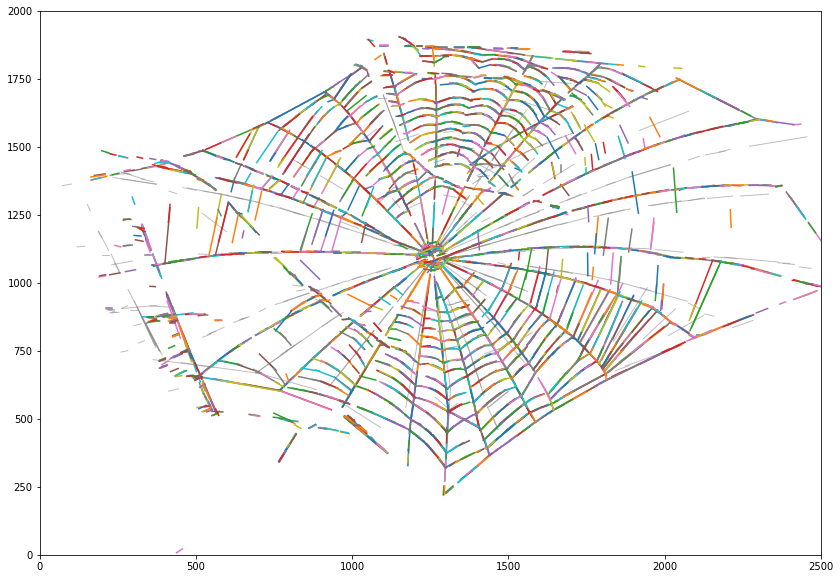

In [37]:
demofig = np.full(testkernel.dimensions[::-1], 0, dtype=np.uint8)

test_ellipse = testkernel.ellipse_transform(origin=(1257, 1105), orientation=0, scaling=0.87).as_list_transformed()  # 1257,1105 are the best origin found by hand.

circle1 = plt.Circle((1257, 1105), 1000, color='blue')

fig,ax = plt.subplots(1, figsize=[int(d/200) for d in testkernel.dimensions])
# ax.imshow(demofig)
for line in testkernel[0:300]:
    p0, p1 = line
    ax.plot((p0[0], p1[0]), (p0[1], p1[1]),color='gray', lw=1, alpha=0.5)
for line in test_ellipse:
    p0, p1 = line
    ax.plot((p0[0], p1[0]), (p0[1], p1[1]))
# ax.add_artist(circle1)
# ax.plot(*full_centroid, 'ro', markersize=12)
ax.set_xlim((0, 2500))
ax.set_ylim((0, 2000))
# ax.set_facecolor("#")
# ax.set_xlim((0, demofig.shape[1]))
# ax.set_ylim((demofig.shape[0], 0))
# ax.axis('off')
plt.show()

In [38]:
interactive_plot = interactive(plot_orientations, orientations=fixed(testpolar_rescaled_line_orientations), threshold=(np.pi/128, np.pi/4))
s = interactive_plot.children[0]
s.step=0.01
s.continuous_update=False
interactive_plot

interactive(children=(FloatSlider(value=0.4049709280018092, continuous_update=False, description='threshold', …

In [39]:
interactive_plot = interactive(plot_orientations, orientations=fixed(test_epolar_rescaled_line_orientations), threshold=(np.pi/128, np.pi/4))
s = interactive_plot.children[0]
s.step=0.01
s.continuous_update=False
interactive_plot

interactive(children=(FloatSlider(value=0.4049709280018092, continuous_update=False, description='threshold', …

**Maybe try considering small thresholds for vertical vs horizontal or consider anything to be horizontal if it is not explicitly vertical**

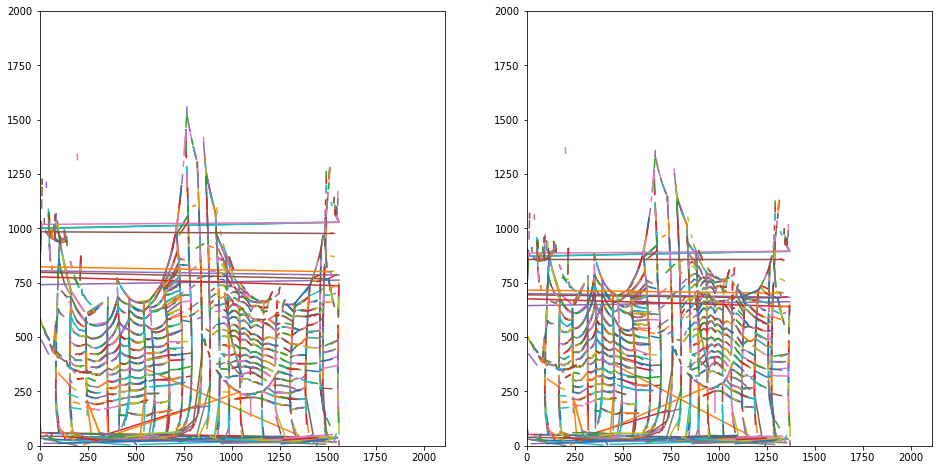

In [40]:
demofig = np.full((2000, 1571), 0, dtype=np.uint8)
fig,ax = plt.subplots(1,2, figsize=(16,8))
# ax.imshow(demofig)

for line in rescale_polar_lines(testpolar, testkernel.dimensions):
    p0, p1 = line
    ax[0].plot((p0[0], p1[0]), (p0[1], p1[1]))
for line in test_epolar_rescaled:
    p0, p1 = line
    ax[1].plot((p0[0], p1[0]), (p0[1], p1[1]))
# ax.plot(*full_centroid, 'ro', markersize=12)
ax[0].set_xlim(0, testkernel.dimensions[1])
ax[0].set_ylim(0,2000)
ax[1].set_xlim(0, testkernel.dimensions[1])
ax[1].set_ylim(0,2000)
# ax.axis('off')
plt.show()

## Complete aside: progress bars
Sometimes progress bars are fun to have. Here's a nice way to do them in Jupyter:


In [41]:
from ipywidgets import IntProgress, HBox
from IPython.display import display
import time

max_count = 100

f = IntProgress(min=0, max=max_count, description='Normal', bar_style='') # instantiate the bar
succ = IntProgress(min=0, max=max_count, description='Success', bar_style='success') # instantiate the bar
info = IntProgress(min=0, max=max_count, description='Info', bar_style='info') # instantiate the bar
warn = IntProgress(min=0, max=max_count, description='Warning', bar_style='warning') # instantiate the bar
danger = IntProgress(min=0, max=max_count, description='Danger', bar_style='danger') # instantiate the bar
colchange = IntProgress(min=0, max=max_count, description='Cycling', bar_style='')
vertchange = IntProgress(min=0, max=max_count, description='VCycling', bar_style='', orientation='vertical')
hboxtest = HBox([vertchange, vertchange, vertchange])

styles = ['success', 'info', 'warning', 'danger', '']

display(f) # display the bar
display(succ)
display(info)
display(warn)
display(danger)
display(colchange)
display(vertchange)
display(hboxtest)


count = 0
while count <= max_count:
    f.value += 1 # signal to increment the progress bar
    succ.value += 1
    info.value += 1
    warn.value += 1
    danger.value += 1
    colchange.value += 1
    vertchange.value += 1
    colchange.bar_style = styles[count%len(styles)]
    vertchange.bar_style = styles[count%len(styles)]
    time.sleep(.1)
    count += 1

IntProgress(value=0, description='Normal')

IntProgress(value=0, bar_style='success', description='Success')

IntProgress(value=0, bar_style='info', description='Info')

IntProgress(value=0, bar_style='warning', description='Warning')

IntProgress(value=0, bar_style='danger', description='Danger')

IntProgress(value=0, description='Cycling')

IntProgress(value=0, description='VCycling', orientation='vertical')

And this one could be useful for interactive colour work.

In [42]:
from ipywidgets import ColorPicker

cpick = ColorPicker(concise=False, description='Pick a colour', value='blue', disabled=False)
display(cpick)

ColorPicker(value='blue', description='Pick a colour')

## Thread classifier

In [68]:
from webmet.merge import WebKernel, load_kernel, multi_find_centroid
testkernel = load_kernel("../data/full_web_kernel.json")
print(testkernel[0])

[[564, 822], [543, 814]]
Length: 22.47220505424423
Orientation: 0.36397895650964407
Type: Uncategorised
ID: 0


In [71]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]

def classify_threads(kernel, hub, threshold=np.pi/20, vertthresh=True):
    """Perform polar coordinate unwrap, rescale, and assesment.
    By default, return proportion of lines left uncategorised."""
    
    polar = kernel.to_polar(origin = hub, flipped = True).rescale(dimensions=kernel.dimensions).recalculate_transformed_orientations()
#     polar_rescaled = rescale_polar_lines(polar, kernel.dimensions)
#     line_orientations = [find_line_orientation(l) for l in polar_rescaled]
    
    out = {l.id: 1 for l in polar if is_vert(l.transformed_orientation, threshold)}
#     [1 for o in line_orientations if is_horiz(o, threshold)]
    
    return out
classify_threads(testkernel, (1257, 1105), np.pi/10) # Hub may well be (1257, 847) after flipping

[[1305, 1117], [1285, 1112]]
Length: 20.615528128088304
Orientation: 0.24497866312686414
Type: Uncategorised
ID: 65
[[1129, 1105], [1205, 1105]]
Length: 76.0
Orientation: 3.141592653589793
Type: Uncategorised
ID: 138
[[1234, 1105], [1255, 1105]]
Length: 21.0
Orientation: 3.141592653589793
Type: Uncategorised
ID: 305


{1: 1,
 3: 1,
 7: 1,
 13: 1,
 23: 1,
 27: 1,
 32: 1,
 33: 1,
 42: 1,
 45: 1,
 49: 1,
 58: 1,
 59: 1,
 62: 1,
 67: 1,
 70: 1,
 75: 1,
 80: 1,
 81: 1,
 87: 1,
 90: 1,
 91: 1,
 92: 1,
 93: 1,
 107: 1,
 110: 1,
 111: 1,
 120: 1,
 123: 1,
 136: 1,
 139: 1,
 143: 1,
 145: 1,
 151: 1,
 154: 1,
 155: 1,
 166: 1,
 168: 1,
 170: 1,
 171: 1,
 175: 1,
 182: 1,
 191: 1,
 192: 1,
 194: 1,
 196: 1,
 201: 1,
 202: 1,
 215: 1,
 216: 1,
 217: 1,
 218: 1,
 221: 1,
 230: 1,
 233: 1,
 234: 1,
 247: 1,
 250: 1,
 252: 1,
 255: 1,
 256: 1,
 262: 1,
 264: 1,
 265: 1,
 268: 1,
 274: 1,
 275: 1,
 277: 1,
 280: 1,
 281: 1,
 286: 1,
 289: 1,
 303: 1,
 309: 1,
 311: 1,
 312: 1,
 314: 1,
 315: 1,
 317: 1,
 321: 1,
 326: 1,
 327: 1,
 329: 1,
 332: 1,
 342: 1,
 346: 1,
 348: 1,
 352: 1,
 354: 1,
 357: 1,
 359: 1,
 368: 1,
 370: 1,
 373: 1,
 376: 1,
 379: 1,
 383: 1,
 390: 1,
 394: 1,
 395: 1,
 397: 1,
 400: 1,
 402: 1,
 404: 1,
 406: 1,
 408: 1,
 411: 1,
 419: 1,
 424: 1,
 427: 1,
 432: 1,
 433: 1,
 434: 1,
 435: 1,
 

In [63]:
weblinescopetest = WebLine([[1, 1], [6, 3]])

def mutatetest(line):
    line.line_type=3
    print(line)
    return line

print(weblinescopetest)
weblinescopetest_after = mutatetest(weblinescopetest)
print(weblinescopetest)
print(weblinescopetest_after)

[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Uncategorised
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1
[[1, 1], [6, 3]]
Length: 5.385164807134504
Orientation: -2.761086276477428
Type: Sticky
ID: -1


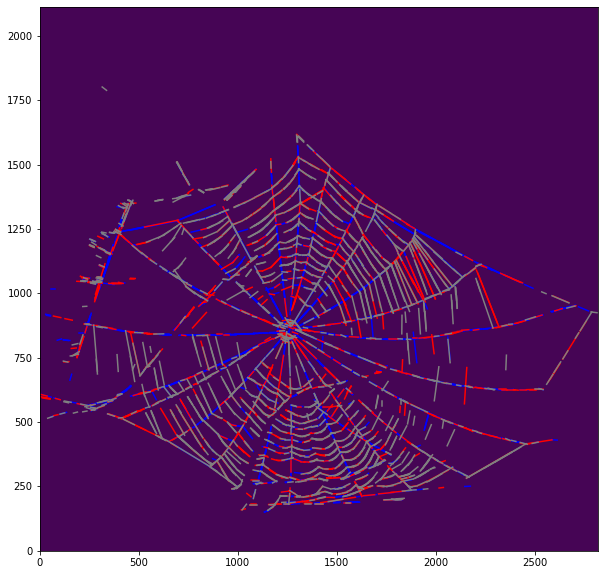

In [46]:
from webmet.merge import WebKernel, WebLine, plot_kernel, load_kernel
module_kernel = load_kernel("../data/full_web_kernel.json", flipped=True)
module_kernel = module_kernel.paint({x:1 for x in range(1000)})
module_kernel = module_kernel.paint({x:3 for x in range(1000, 2000)}, reset_missing=False)
# module_kernel = module_kernel.demo_random_paint()
plot_kernel(module_kernel)

Create version of the json loader which loads web kernels and flips them (or make it so that exported ones are flipped)

In [47]:
def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
def flip_web(lines):
    x, y = zip(*list(chain.from_iterable(lines)))
    y = np.asarray(y)
    miny = min(y)
    maxy = max(y)
    
    # Normalise y by setting min to 0
    normy = y - miny
    # Find line of reflection
    normmid = (maxy - miny) / 2
    # Find diff of points from line of reflection
    normdelta = normy - normmid
    # Flip these diffs to invert points
    normflippeddelta = normdelta * -1
    # Apply diffs back to line of reflection to get new normalised points
    normflippedy = normflippeddelta + normmid
    # Revert y normalisation
    flippedy = normflippedy + miny
    
    # Pack into new list
    newpoints = list(zip(x, flippedy.astype(int).tolist()))
    # Chunk and return
    return [x for x in chunks(newpoints, 2)]

fliptest = flip_web([[[1,2], [3,4]], [[5,6], [7,8]]])
print(fliptest)

[[(1, 8), (3, 6)], [(5, 4), (7, 2)]]
